## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9565348	total: 59.4ms	remaining: 59.3s
1:	learn: 0.9384299	total: 60.6ms	remaining: 30.2s
2:	learn: 0.9201107	total: 61.5ms	remaining: 20.4s
3:	learn: 0.9044294	total: 62.6ms	remaining: 15.6s
4:	learn: 0.8880653	total: 63.7ms	remaining: 12.7s
5:	learn: 0.8718628	total: 64.6ms	remaining: 10.7s
6:	learn: 0.8574739	total: 65.6ms	remaining: 9.31s
7:	learn: 0.8424499	total: 66.6ms	remaining: 8.26s
8:	learn: 0.8280897	total: 67.5ms	remaining: 7.43s
9:	learn: 0.8124309	total: 68.4ms	remaining: 6.77s
10:	learn: 0.7980807	total: 69.2ms	remaining: 6.22s
11:	learn: 0.7849942	total: 70.1ms	remaining: 5.77s
12:	learn: 0.7707381	total: 71ms	remaining: 5.39s
13:	learn: 0.7571475	total: 71.8ms	remaining: 5.06s
14:	learn: 0.7469455	total: 72.9ms	remaining: 4.78s
15:	learn: 0.7342241	total: 73.7ms	remaining: 4.53s
16:	learn: 0.7217020	total: 74.5ms	remaining: 4.31s
17:	learn: 0.7108064	total: 75.4ms	remaining: 4.11s
18:	learn: 0.6993801	total: 76.4ms	remaining: 

57:	learn: 0.4326107	total: 111ms	remaining: 1.8s
58:	learn: 0.4290497	total: 112ms	remaining: 1.79s
59:	learn: 0.4258908	total: 113ms	remaining: 1.77s
60:	learn: 0.4220674	total: 114ms	remaining: 1.75s
61:	learn: 0.4181711	total: 115ms	remaining: 1.74s
62:	learn: 0.4140320	total: 116ms	remaining: 1.72s
63:	learn: 0.4105891	total: 117ms	remaining: 1.71s
64:	learn: 0.4062918	total: 118ms	remaining: 1.69s
65:	learn: 0.4029467	total: 118ms	remaining: 1.68s
66:	learn: 0.3992724	total: 119ms	remaining: 1.66s
67:	learn: 0.3958429	total: 120ms	remaining: 1.65s
68:	learn: 0.3917864	total: 121ms	remaining: 1.63s
69:	learn: 0.3878279	total: 122ms	remaining: 1.62s
70:	learn: 0.3840209	total: 123ms	remaining: 1.6s
71:	learn: 0.3816654	total: 124ms	remaining: 1.59s
72:	learn: 0.3789958	total: 124ms	remaining: 1.58s
73:	learn: 0.3759233	total: 125ms	remaining: 1.57s
74:	learn: 0.3722232	total: 126ms	remaining: 1.56s
75:	learn: 0.3705690	total: 127ms	remaining: 1.54s
76:	learn: 0.3683301	total: 128ms

148:	learn: 0.2582906	total: 193ms	remaining: 1.1s
149:	learn: 0.2576316	total: 194ms	remaining: 1.1s
150:	learn: 0.2568091	total: 194ms	remaining: 1.09s
151:	learn: 0.2561342	total: 195ms	remaining: 1.09s
152:	learn: 0.2554978	total: 196ms	remaining: 1.09s
153:	learn: 0.2546429	total: 197ms	remaining: 1.08s
154:	learn: 0.2537525	total: 198ms	remaining: 1.08s
155:	learn: 0.2531796	total: 199ms	remaining: 1.08s
156:	learn: 0.2527310	total: 200ms	remaining: 1.07s
157:	learn: 0.2521205	total: 201ms	remaining: 1.07s
158:	learn: 0.2509073	total: 202ms	remaining: 1.07s
159:	learn: 0.2500959	total: 202ms	remaining: 1.06s
160:	learn: 0.2493900	total: 203ms	remaining: 1.06s
161:	learn: 0.2486507	total: 204ms	remaining: 1.06s
162:	learn: 0.2478721	total: 205ms	remaining: 1.05s
163:	learn: 0.2468924	total: 206ms	remaining: 1.05s
164:	learn: 0.2463569	total: 207ms	remaining: 1.05s
165:	learn: 0.2452363	total: 208ms	remaining: 1.04s
166:	learn: 0.2446872	total: 209ms	remaining: 1.04s
167:	learn: 0.

268:	learn: 0.1883718	total: 302ms	remaining: 822ms
269:	learn: 0.1881625	total: 304ms	remaining: 821ms
270:	learn: 0.1879276	total: 305ms	remaining: 820ms
271:	learn: 0.1873880	total: 306ms	remaining: 819ms
272:	learn: 0.1868455	total: 307ms	remaining: 817ms
273:	learn: 0.1865056	total: 308ms	remaining: 816ms
274:	learn: 0.1860307	total: 309ms	remaining: 814ms
275:	learn: 0.1854883	total: 310ms	remaining: 813ms
276:	learn: 0.1850462	total: 311ms	remaining: 811ms
277:	learn: 0.1845715	total: 312ms	remaining: 810ms
278:	learn: 0.1841250	total: 313ms	remaining: 808ms
279:	learn: 0.1837129	total: 314ms	remaining: 807ms
280:	learn: 0.1832406	total: 315ms	remaining: 805ms
281:	learn: 0.1826706	total: 316ms	remaining: 804ms
282:	learn: 0.1823207	total: 317ms	remaining: 802ms
283:	learn: 0.1817972	total: 318ms	remaining: 801ms
284:	learn: 0.1813607	total: 319ms	remaining: 799ms
285:	learn: 0.1809244	total: 320ms	remaining: 798ms
286:	learn: 0.1805765	total: 321ms	remaining: 797ms
287:	learn: 

340:	learn: 0.1590754	total: 383ms	remaining: 740ms
341:	learn: 0.1586420	total: 384ms	remaining: 739ms
342:	learn: 0.1581361	total: 385ms	remaining: 738ms
343:	learn: 0.1577432	total: 386ms	remaining: 736ms
344:	learn: 0.1573500	total: 387ms	remaining: 735ms
345:	learn: 0.1570756	total: 388ms	remaining: 733ms
346:	learn: 0.1567166	total: 389ms	remaining: 732ms
347:	learn: 0.1564633	total: 390ms	remaining: 730ms
348:	learn: 0.1559349	total: 391ms	remaining: 729ms
349:	learn: 0.1556006	total: 392ms	remaining: 727ms
350:	learn: 0.1551661	total: 393ms	remaining: 726ms
351:	learn: 0.1549635	total: 393ms	remaining: 724ms
352:	learn: 0.1546422	total: 394ms	remaining: 723ms
353:	learn: 0.1542693	total: 395ms	remaining: 721ms
354:	learn: 0.1540265	total: 396ms	remaining: 719ms
355:	learn: 0.1537853	total: 397ms	remaining: 718ms
356:	learn: 0.1534867	total: 398ms	remaining: 716ms
357:	learn: 0.1530897	total: 399ms	remaining: 715ms
358:	learn: 0.1526605	total: 400ms	remaining: 713ms
359:	learn: 

461:	learn: 0.1224858	total: 493ms	remaining: 574ms
462:	learn: 0.1221675	total: 494ms	remaining: 573ms
463:	learn: 0.1220604	total: 495ms	remaining: 572ms
464:	learn: 0.1217931	total: 496ms	remaining: 570ms
465:	learn: 0.1215777	total: 497ms	remaining: 569ms
466:	learn: 0.1213103	total: 498ms	remaining: 568ms
467:	learn: 0.1210440	total: 498ms	remaining: 567ms
468:	learn: 0.1208554	total: 499ms	remaining: 565ms
469:	learn: 0.1206622	total: 500ms	remaining: 564ms
470:	learn: 0.1204133	total: 501ms	remaining: 563ms
471:	learn: 0.1202474	total: 502ms	remaining: 562ms
472:	learn: 0.1199516	total: 503ms	remaining: 560ms
473:	learn: 0.1196231	total: 504ms	remaining: 559ms
474:	learn: 0.1194495	total: 505ms	remaining: 558ms
475:	learn: 0.1192192	total: 505ms	remaining: 556ms
476:	learn: 0.1189653	total: 506ms	remaining: 555ms
477:	learn: 0.1187744	total: 507ms	remaining: 554ms
478:	learn: 0.1185756	total: 508ms	remaining: 553ms
479:	learn: 0.1183991	total: 509ms	remaining: 551ms
480:	learn: 

551:	learn: 0.1052372	total: 574ms	remaining: 466ms
552:	learn: 0.1050783	total: 575ms	remaining: 465ms
553:	learn: 0.1050081	total: 576ms	remaining: 464ms
554:	learn: 0.1048959	total: 577ms	remaining: 462ms
555:	learn: 0.1047532	total: 578ms	remaining: 461ms
556:	learn: 0.1045735	total: 579ms	remaining: 460ms
557:	learn: 0.1044125	total: 579ms	remaining: 459ms
558:	learn: 0.1041777	total: 580ms	remaining: 458ms
559:	learn: 0.1039071	total: 581ms	remaining: 457ms
560:	learn: 0.1037455	total: 582ms	remaining: 455ms
561:	learn: 0.1035450	total: 583ms	remaining: 454ms
562:	learn: 0.1033758	total: 584ms	remaining: 453ms
563:	learn: 0.1032359	total: 585ms	remaining: 452ms
564:	learn: 0.1030269	total: 586ms	remaining: 451ms
565:	learn: 0.1028529	total: 587ms	remaining: 450ms
566:	learn: 0.1026916	total: 588ms	remaining: 449ms
567:	learn: 0.1025577	total: 588ms	remaining: 448ms
568:	learn: 0.1023481	total: 589ms	remaining: 446ms
569:	learn: 0.1021939	total: 590ms	remaining: 445ms
570:	learn: 

674:	learn: 0.0871150	total: 684ms	remaining: 329ms
675:	learn: 0.0870061	total: 685ms	remaining: 328ms
676:	learn: 0.0868601	total: 686ms	remaining: 327ms
677:	learn: 0.0866726	total: 687ms	remaining: 326ms
678:	learn: 0.0865265	total: 688ms	remaining: 325ms
679:	learn: 0.0863325	total: 689ms	remaining: 324ms
680:	learn: 0.0861454	total: 689ms	remaining: 323ms
681:	learn: 0.0860395	total: 690ms	remaining: 322ms
682:	learn: 0.0859402	total: 691ms	remaining: 321ms
683:	learn: 0.0857885	total: 692ms	remaining: 320ms
684:	learn: 0.0857144	total: 693ms	remaining: 319ms
685:	learn: 0.0855823	total: 694ms	remaining: 318ms
686:	learn: 0.0853865	total: 695ms	remaining: 317ms
687:	learn: 0.0853371	total: 696ms	remaining: 315ms
688:	learn: 0.0851805	total: 696ms	remaining: 314ms
689:	learn: 0.0850464	total: 697ms	remaining: 313ms
690:	learn: 0.0848901	total: 698ms	remaining: 312ms
691:	learn: 0.0847111	total: 699ms	remaining: 311ms
692:	learn: 0.0846395	total: 700ms	remaining: 310ms
693:	learn: 

764:	learn: 0.0763916	total: 766ms	remaining: 235ms
765:	learn: 0.0763360	total: 767ms	remaining: 234ms
766:	learn: 0.0761702	total: 768ms	remaining: 233ms
767:	learn: 0.0760972	total: 768ms	remaining: 232ms
768:	learn: 0.0759949	total: 769ms	remaining: 231ms
769:	learn: 0.0759133	total: 770ms	remaining: 230ms
770:	learn: 0.0758256	total: 771ms	remaining: 229ms
771:	learn: 0.0757003	total: 772ms	remaining: 228ms
772:	learn: 0.0755482	total: 773ms	remaining: 227ms
773:	learn: 0.0754437	total: 774ms	remaining: 226ms
774:	learn: 0.0752213	total: 774ms	remaining: 225ms
775:	learn: 0.0751246	total: 775ms	remaining: 224ms
776:	learn: 0.0749771	total: 776ms	remaining: 223ms
777:	learn: 0.0748695	total: 777ms	remaining: 222ms
778:	learn: 0.0747672	total: 778ms	remaining: 221ms
779:	learn: 0.0747480	total: 779ms	remaining: 220ms
780:	learn: 0.0746123	total: 780ms	remaining: 219ms
781:	learn: 0.0745433	total: 781ms	remaining: 218ms
782:	learn: 0.0744210	total: 782ms	remaining: 217ms
783:	learn: 

888:	learn: 0.0642354	total: 875ms	remaining: 109ms
889:	learn: 0.0641108	total: 876ms	remaining: 108ms
890:	learn: 0.0640477	total: 877ms	remaining: 107ms
891:	learn: 0.0639232	total: 878ms	remaining: 106ms
892:	learn: 0.0638361	total: 879ms	remaining: 105ms
893:	learn: 0.0637939	total: 880ms	remaining: 104ms
894:	learn: 0.0637830	total: 881ms	remaining: 103ms
895:	learn: 0.0636929	total: 882ms	remaining: 102ms
896:	learn: 0.0635700	total: 883ms	remaining: 101ms
897:	learn: 0.0635101	total: 884ms	remaining: 100ms
898:	learn: 0.0634783	total: 884ms	remaining: 99.4ms
899:	learn: 0.0633930	total: 885ms	remaining: 98.4ms
900:	learn: 0.0633545	total: 886ms	remaining: 97.4ms
901:	learn: 0.0632982	total: 887ms	remaining: 96.4ms
902:	learn: 0.0632761	total: 888ms	remaining: 95.4ms
903:	learn: 0.0631867	total: 889ms	remaining: 94.4ms
904:	learn: 0.0631261	total: 890ms	remaining: 93.4ms
905:	learn: 0.0629794	total: 890ms	remaining: 92.4ms
906:	learn: 0.0629023	total: 892ms	remaining: 91.4ms
907

980:	learn: 0.0574034	total: 957ms	remaining: 18.5ms
981:	learn: 0.0573918	total: 958ms	remaining: 17.6ms
982:	learn: 0.0572792	total: 959ms	remaining: 16.6ms
983:	learn: 0.0572128	total: 960ms	remaining: 15.6ms
984:	learn: 0.0571861	total: 960ms	remaining: 14.6ms
985:	learn: 0.0570904	total: 961ms	remaining: 13.6ms
986:	learn: 0.0570012	total: 962ms	remaining: 12.7ms
987:	learn: 0.0569610	total: 963ms	remaining: 11.7ms
988:	learn: 0.0568670	total: 964ms	remaining: 10.7ms
989:	learn: 0.0568577	total: 965ms	remaining: 9.75ms
990:	learn: 0.0568168	total: 966ms	remaining: 8.77ms
991:	learn: 0.0567512	total: 967ms	remaining: 7.8ms
992:	learn: 0.0565921	total: 968ms	remaining: 6.82ms
993:	learn: 0.0564828	total: 969ms	remaining: 5.85ms
994:	learn: 0.0564071	total: 970ms	remaining: 4.87ms
995:	learn: 0.0563052	total: 970ms	remaining: 3.9ms
996:	learn: 0.0562102	total: 971ms	remaining: 2.92ms
997:	learn: 0.0562050	total: 972ms	remaining: 1.95ms
998:	learn: 0.0560928	total: 973ms	remaining: 97

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

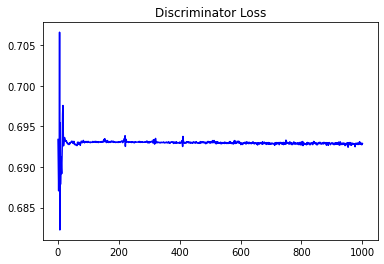

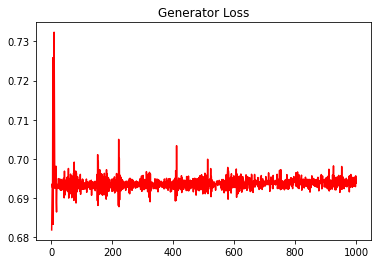

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08396540997089585


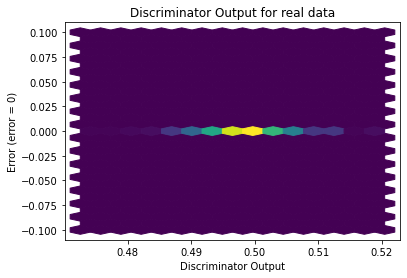

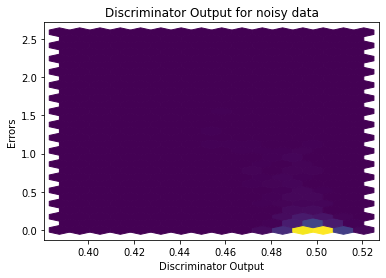

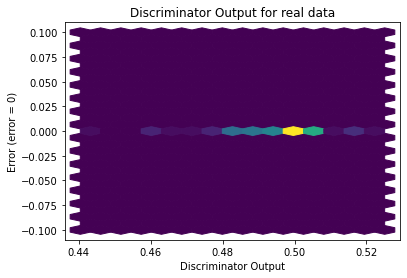

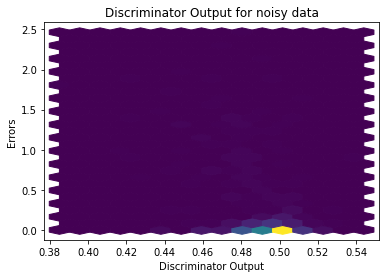

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


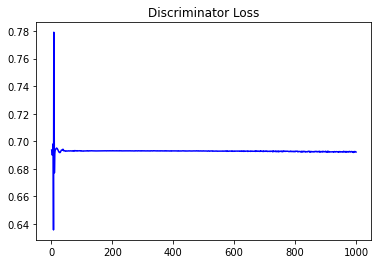

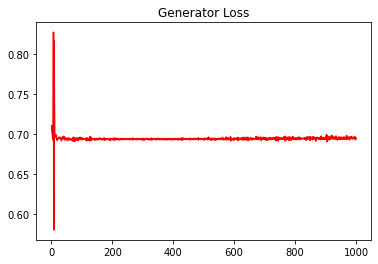

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07959813292838801


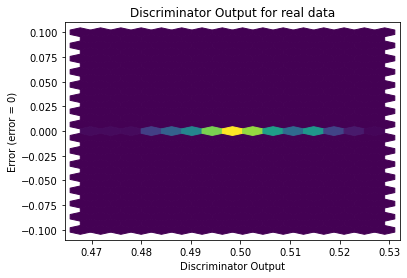

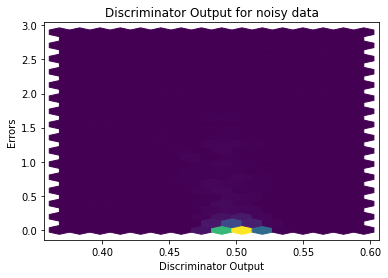

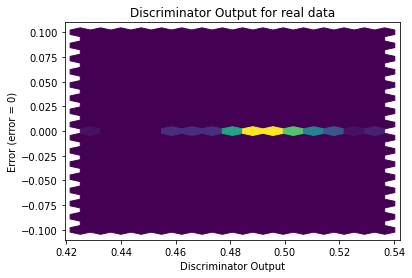

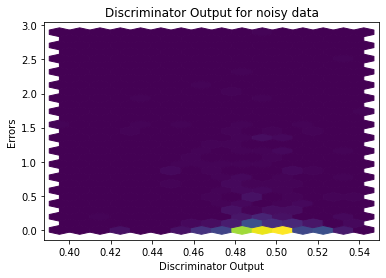

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5369]], requires_grad=True)
